# Perceptron

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X,Y = make_blobs(n_samples=500,centers=2,n_features=2,random_state=11)
print(X.shape,Y.shape)

(500, 2) (500,)


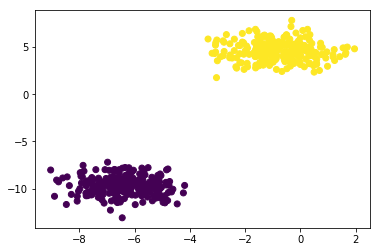

In [3]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [4]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

In [5]:
def predict(X,weights):
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions

def loss(X,Y,weights):
    Y_ = predict(X,weights)
    loss = np.mean(-Y*np.log(Y_)-(1-Y)*np.log(1-Y_))
    return loss

def update(X,Y,weights,learning_rate):
    
    Y_ = predict(X,weights)
    dw = np.dot(X.T,Y_-Y)
    
    weights = weights - (learning_rate*dw)
    return weights

def train(X,Y,learning_rate=0.0005,maxEpochs=100):
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    
    weights = np.zeros((X.shape[1],1))
    loss_list = []
    
    for epochs in range(maxEpochs):
        loss_list.append(loss(X,Y,weights))
        #print("loss is ",loss(X,Y,weights))
        weights = update(X,Y,weights,learning_rate)
        #print(weights)
        
    return weights,loss_list

In [6]:
weights,loss_list = train(X,Y.reshape((500,1)))

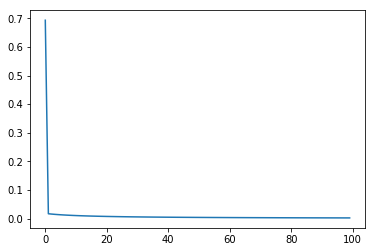

In [7]:
plt.plot(loss_list)

In [8]:
def getPredictions(X_test,weights):
    
    if X_test.shape[1] != weights.shape[0]:
        ones = np.ones((X_test.shape[0],1))
        X_test = np.hstack((ones,X_test))
        
    probs = predict(X_test,weights)
    
    labels = np.zeros(probs.shape)
    labels[probs >= 0.5] = 1
    return labels

In [9]:
x1 = np.linspace(-12,2,10)

x2 = -(weights[0] + weights[1]*x1)/weights[2]

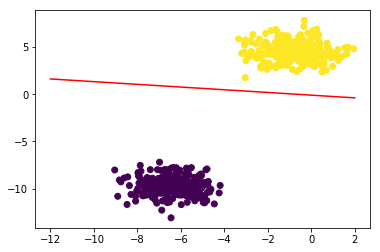

In [10]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.plot(x1,x2,c='red')
plt.show()

In [19]:
Y_ = getPredictions(X,weights)

accuracy = np.sum(Y.reshape((500,1))==Y_)/Y.shape[0]
print(accuracy)

1.0


# 3 layer architecture

In [1]:
input_size = 3  # Number of features
layers = [4,3]  # Number of neurons in 1st and 2nd layer
output_size = 2

In [2]:
def softmax(a):
    e_pa = np.exp(a)
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [19]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model ={}
        
        # First layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        # Second layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        # Third layer/ Output layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
        
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
    
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        m = x.shape[0]
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_-y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)#/m
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)#/m
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis=0)#/m
        
        # update parameters using gradient descent
        
        self.model['W1'] -= learning_rate * dw1
        self.model['b1'] -= learning_rate * db1
        
        self.model['W2'] -= learning_rate * dw2
        self.model['b2'] -= learning_rate * db2
        
        self.model['W3'] -= learning_rate * dw3
        self.model['b3'] -= learning_rate * db3
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)

In [3]:
def loss(y_oht,y_):
        l = -np.mean(y_oht*np.log(y_))
        return l

def one_hot(y,n_classes):
    m = y.shape[0]
    y_oht = np.zeros((m,n_classes))
    
    y_oht[np.arange(m),y] = 1
    
    return y_oht

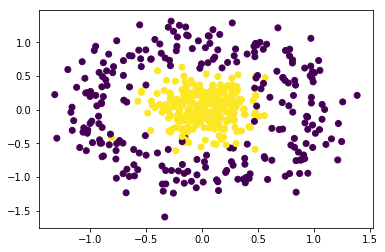

In [4]:
from sklearn.datasets import make_circles

X,Y = make_circles(n_samples=500,shuffle=True,noise=0.2,random_state=1,factor=0.2)

plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [20]:
model = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [5]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    classes = 2
    
    Y_oht = one_hot(Y,classes)
    
    for i in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_oht,Y_)
        model.backward(X,Y_oht,learning_rate)
        training_loss.append(l)
        if(logs):
            print("Epoch: {} loss :{}".format(i,l))
            
    return training_loss

In [21]:
training_loss = train(X,Y,model,500,0.001)

Epoch: 0 loss :0.3570778358444834
Epoch: 1 loss :0.35539016543449947
Epoch: 2 loss :0.25929981288772785
Epoch: 3 loss :0.2407145422493582
Epoch: 4 loss :0.22578256002970135
Epoch: 5 loss :0.2132015270110819
Epoch: 6 loss :0.20202048362909888
Epoch: 7 loss :0.1919060028361365
Epoch: 8 loss :0.18266687177949364
Epoch: 9 loss :0.17419320960390167
Epoch: 10 loss :0.16641108491082002
Epoch: 11 loss :0.15926137833548903
Epoch: 12 loss :0.15269226391596008
Epoch: 13 loss :0.14665577858026574
Epoch: 14 loss :0.14110684386598593
Epoch: 15 loss :0.13600303045326262
Epoch: 16 loss :0.1313046287789121
Epoch: 17 loss :0.12697475206146283
Epoch: 18 loss :0.12297939092594808
Epoch: 19 loss :0.11928739615176076
Epoch: 20 loss :0.1158703964896471
Epoch: 21 loss :0.11270266742940549
Epoch: 22 loss :0.10976096747872616
Epoch: 23 loss :0.10702435607552933
Epoch: 24 loss :0.10447400402037514
Epoch: 25 loss :0.10209300436028074
Epoch: 26 loss :0.0998661892239548
Epoch: 27 loss :0.09777995622179947
Epoch: 28

Epoch: 288 loss :0.04260134170548477
Epoch: 289 loss :0.0425777269831106
Epoch: 290 loss :0.042554245113356454
Epoch: 291 loss :0.042530894798664814
Epoch: 292 loss :0.04250767476083742
Epoch: 293 loss :0.04248458374062701
Epoch: 294 loss :0.042461620497338357
Epoch: 295 loss :0.04243878380843779
Epoch: 296 loss :0.04241607246917134
Epoch: 297 loss :0.042393485292191314
Epoch: 298 loss :0.04237102110719094
Epoch: 299 loss :0.04234867876054734
Epoch: 300 loss :0.04232645711497217
Epoch: 301 loss :0.04230435504917014
Epoch: 302 loss :0.04228237145750519
Epoch: 303 loss :0.042260505249674084
Epoch: 304 loss :0.042238755350387215
Epoch: 305 loss :0.04221712069905692
Epoch: 306 loss :0.04219560024949248
Epoch: 307 loss :0.042174192969602245
Epoch: 308 loss :0.042152897841102516
Epoch: 309 loss :0.04213171385923303
Epoch: 310 loss :0.04211064003247891
Epoch: 311 loss :0.042089675382299206
Epoch: 312 loss :0.0420688189428615
Epoch: 313 loss :0.042048069760782694
Epoch: 314 loss :0.04202742689

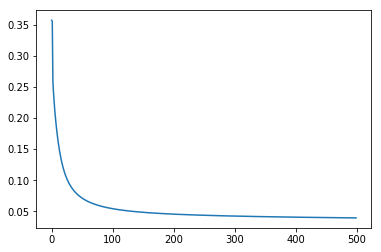

In [22]:
plt.plot(training_loss)
plt.show()

In [23]:
output = model.predict(X)

accuracy = np.sum(output==Y)/Y.shape[0]
print(accuracy)

0.97
